Автор материала: . Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

## <center> Линейный регрессионный анализ на Python  </center>  

## <center> Построение моделей для задачи регрессии. Линейная регрессия. Регуляризация </center>

Пусть у нас есть множество $n$ объектов S с известными значениями количественного 
признака $y$. 
Задача регрессии состоит в том, чтобы найти (предсказать) значение количественного признака $y$ для нового объекта А по значениям одного или нескольких других количественных признаков (независимых переменных) $x_1,\dots,x_m$.

Признак $y$ называется целевым признаком (откликом, зависимой переменной). 

Термин «Регрессия» появился, потому что исторически первая задача предсказания количественного признака обнаружила эффект «возврата (регресса) к среднему». Когда исследовали зависимость роста сына  от роста его отца, то было замечено, что «рост сына приближался (регрессировал) к среднему росту  мужчин.

Примеры задач:

-	Прогнозирование объемов продаж
-	Предсказание стоимости жилья
-	Прогнозирование спроса на товары 

Очевидно, что в общем случае стоимость квартир зависит от многих факторов: площади, географического расположения, этажа и т.п. Зная характер этой зависимости, можно оценить (предсказать) стоимость любой квартиры.

**ПЛАН РЕШЕНИЯ ЗАДАЧИ РЕГРЕССИИ**

Выборка делится на обучающую (Train) и на тестовую (Test). Модель предсказания строится по объектам Train, а качество модели проверяется по объектам Test (обучение с учителем). Допустим, по тренировочной выборке мы научились предсказывать целевой признак $y$.  

Качество предсказаний по тестовой выборке можно определить, например, при помощи среднеквадратичной ошибки *MSE* (сумма квадратов разностей между фактическими и предсказанными значениями целевого признака, деленная на объем выборки).
$$ MSE  = \frac{1}{n}\sum_{i=1}^n \left(y_i - y'_i\right)^2,$$
где $y_i$ - значения целевой переменной,  $y'_i$ - предсказанные моделью значения целевой переменной.

Рассмотрим модель линейной регрессии. В первую очередь, необходимо задать модель зависимости объясняемой переменной $y$ от объясняющих ее факторов, функция зависимости будет линейной: $y = w_0 + \sum_{i=1}^m w_i x_i=w_0+w_1 x_1 +\dots + w_m x_m$. Если $m = 1$, то это простая линейная регрессия, иначе множественная линейная регрессия. Кроме модели линейной регрессии, существуют также квадратичная, полиномиальная и т.д.

Если мы добавим фиктивную размерность $x_0 = 1$ для каждого наблюдения, тогда линейную форму можно переписать чуть более компактно, записав свободный член $w_0$ под сумму: $y = \sum_{i=0}^m w_i x_i = \textbf{w}^{\text{T}} \textbf{x}$. Если рассматривать матрицу наблюдения-признаки, у которой в строках находятся примеры из набора данных, то нам необходимо добавить единичную колонку слева. Зададим модель следующим образом:

$$\large \textbf y = \textbf{X} \textbf w + \epsilon,$$

где
- $\textbf{y} \in \mathbb{R}^n$ – объясняемая (или целевая) переменная;
- $\textbf{w}\in \mathbb{R}^{m+1}$ – вектор параметров модели (в машинном обучении эти параметры часто называют весами);
- $\textbf{X}$ – матрица наблюдений и признаков размерности $n$ строк на $m + 1$ столбцов (включая фиктивную единичную колонку слева) с полным рангом по столбцам: $\text{rank}\left(\textbf{X}\right) = m + 1$;
- $\epsilon$ – случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели.

Можем выписать выражение для каждого конкретного наблюдения

$$\large 
y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

Одним из способов вычислить значения оптимальных весов модели является <b>метод наименьших квадратов</b> (МНК), который минимизирует сумму квадратов отклонений между реальными значениями зависимой переменной и прогнозами, выданными моделью (квадратов остатков):

$$\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) = \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 $$


Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения системы относительно неизвестных весов $\textbf{w}$.

Возможны следующие проблемы при решении системы: 
* Между нецелевыми признаками существует линейная зависимость или сильная корреляция (коллинеарность). В случае линейной зависимости между нецелевыми признаками система не имеет решений или имеет бесконечное множество решений: при неудачном выборе весов возможна большая ошибка на объектах, не попавших в тренировочную выборку. Это произойдет, когда в качестве коэффициентов будут выбраны большие числа; способы борьбы - ниже

**В случае простой линейной регрессии надо найти прямую**
$$y=ax+b,$$
$a$ - наклон
$b$ - смещение,
такую что сумма квадратов отклонений минимальна:

$$\sum_{i=1}^n \left(y_i - a{x}_i-b\right)^2\to \min $$


Здесь $x$ - независимая переменная, $y$ - зависимая. 


<img src="https://image3.slideserve.com/6992757/slide10-l.jpg" width="50%">

<img src="https://image2.slideserve.com/5210947/slide17-l.jpg" width="40%">

## <center> Борьба с мультколлинеарностью. Отбор признаков. Линейная регрессия с регуляризацией  </center>

Иногда в данных мы можем наблюдать так называемую коллинеарность (мультиколлинеарность) — когда два (в случае мультиколлинеарности несколько) признаков сильно скоррелированы, в матрице  𝐗  это проявляется в виде "почти" линейной зависимости столбцов. 


Силу взаимосвязи двух количественных признаков можно определить при помощи коэффициента Пирсона – это математический коэффициент корреляции, представляющий взаимосвязь между двумя переменными, обозначаемыми как X и Y. 
Коэффициенты Пирсона варьируются от +1 до -1, где +1 представляет положительную корреляцию, -1 представляет отрицательную корреляцию, а 0 означает отсутствие взаимосвязи.  Если две переменные связаны между собой, так что значение коэффициента корреляции достаточно большое, то в этом случае можно прогнозировать (с некоторой точностью) неизвестное значение одной переменной по известному значению другой. Считают явление коллинеарности в исходных данных установленным, если коэффициент парной корреляции между двумя переменными больше 0,7 (в учебнике Мхитаряна - 0, 8). Чтобы избавиться от коллинеарности, из модели исключают один из линейно связанных между собой факторов. Предпочтение при этом отдается не фактору, более тесно связанному с результатом, а фактору, который при достаточно тесной связи с результатом имеет наименьшую тесноту связи с другими факторами.

С целью выявления факта коллинеарности факторов составляется матрица парных коэффициентов корреляции, измеряющих тесноту связи каждого из факторов-признаков с результативным фактором и между собой.

Коэффициент Пирсона вычисляется по формуле
$$r_{xy} = \frac{cov(x,y)}{S_xS_y},$$
где 
$cov(x,y)=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y}).$

Здесь 
$S_x=\sqrt{\frac{1}{n}\sum({x_i-\overline{x}})^2},\; S_y=\sqrt{\frac{1}{n}\sum({y_i-\overline{y}})^2}$ -- стандартные отклонения. 

В случае если есть мультиколлинеарность, чтобы модель получилась адекватной, можно

* делать отбор признаков (нужно удалять нецелевые признаки, которые линейно зависят от других или имеют высокую корреляцию с другими признаками), 
* применять линейную регрессию с L1-, L2- регуляризацией.
* применять метод главных компонент 

Lasso-регрессия решает задачу минимизации среднеквадратичной ошибки с L1-регуляризацией:
$$\Large error(X, y, w) =  \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=0}^d |w_i|,$$

где $y = w^Tx$ – уравнение гиперплоскости, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

Ridge-регрессия (или гребневая регрессия) решает задачу минимизации среднеквардатичной ошибки с L2-регуляризацией:
$$\Large error(X, y, w) = \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=0}^d w_i^2,$$

где $y = w^Tx$ – уравнение гиперплоскости, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

## <center>Пример. Задача о спросе на прокат велосипедов </center>

Загрузим данные по спросу на прокат велосипедов (целевой столбец cnt - количество) в зависимости от наличия праздника/выходного, времени года, месяца, дня недели, погоды (влажность, скорость ветра, температура, средняя температура) и других факторов. Будем предсказывать спрос при помощи модели линейной регрессии.

**А именно, для каждого дня проката известны следующие признаки:**

- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12 (соответственно январь---декабрь)
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6 (соответственно понедельник---воскресенье)
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура по шкале Цельсия
- atemp: средняя температура  по шкале Цельсия
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("../input/bikes-rent/bikes_rent.csv")

In [3]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [4]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,20.310776,7.505091,2.424346,13.820424,20.431653,26.872076,35.328347
atemp,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000


**Посмотрим на корреляционную матрицу:**
(чем ближе коэффициенты к 1, тем большая зависимость наблюдается у признаков, если коэффициент положительный, то зависимость прямая, иначе обратная). Посмотрим также на соответствующую тепловую карту. 

In [6]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


(12.5, -0.5)

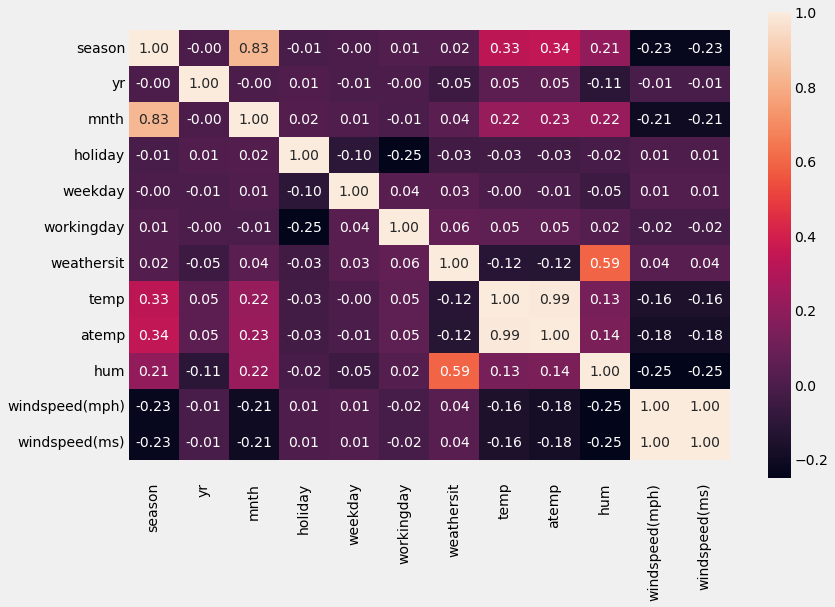

In [7]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.drop(["cnt"],axis=1).corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Заметим, что в полученной матрице есть коллинеарные переменные, такие как windspeed(mph), windspeed(ms),temp и atemp, mnth и season, значит их нужно удалять перед составлением уравнения регрессии! Вычислим  определитель матрицы. Увидим, что определитель матрицы близок к нулю. Такая матрица называется *плохо обусловленной* и в этом случае модель множественной регрессии  ненадежна. Значит надо применять методы борьбы  (отбор признаков, метод главных компонент, регрессия с регуляризацией) 

In [8]:
import numpy as np
print(np.linalg.det(df.corr()))

4.91807062331123e-19


Рассмотрим всевозможные графики для лучшего понимания набора:

<AxesSubplot:>

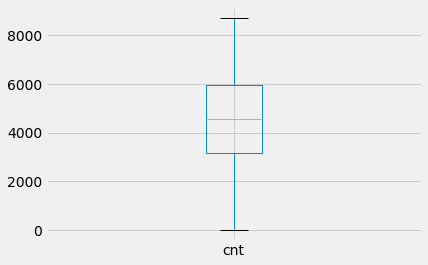

In [9]:
df.boxplot(column="cnt")

<AxesSubplot:>

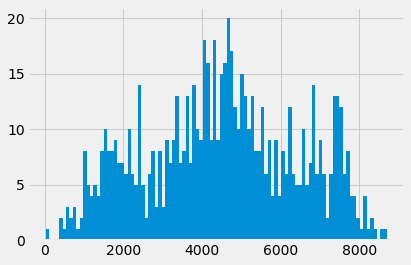

In [10]:
df["cnt"].hist(bins = 100)

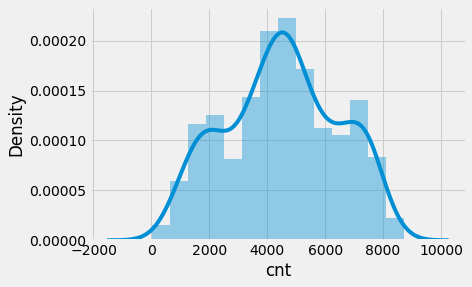

In [11]:
sns.distplot(df["cnt"]);

<AxesSubplot:>

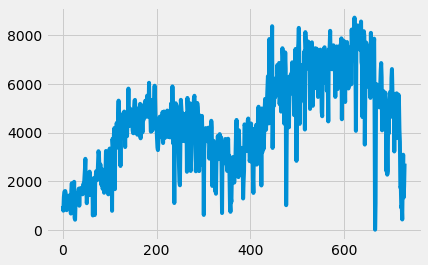

In [12]:
df["cnt"].plot()

In [13]:
#sns.violinplot(df["season"], df["cnt"])

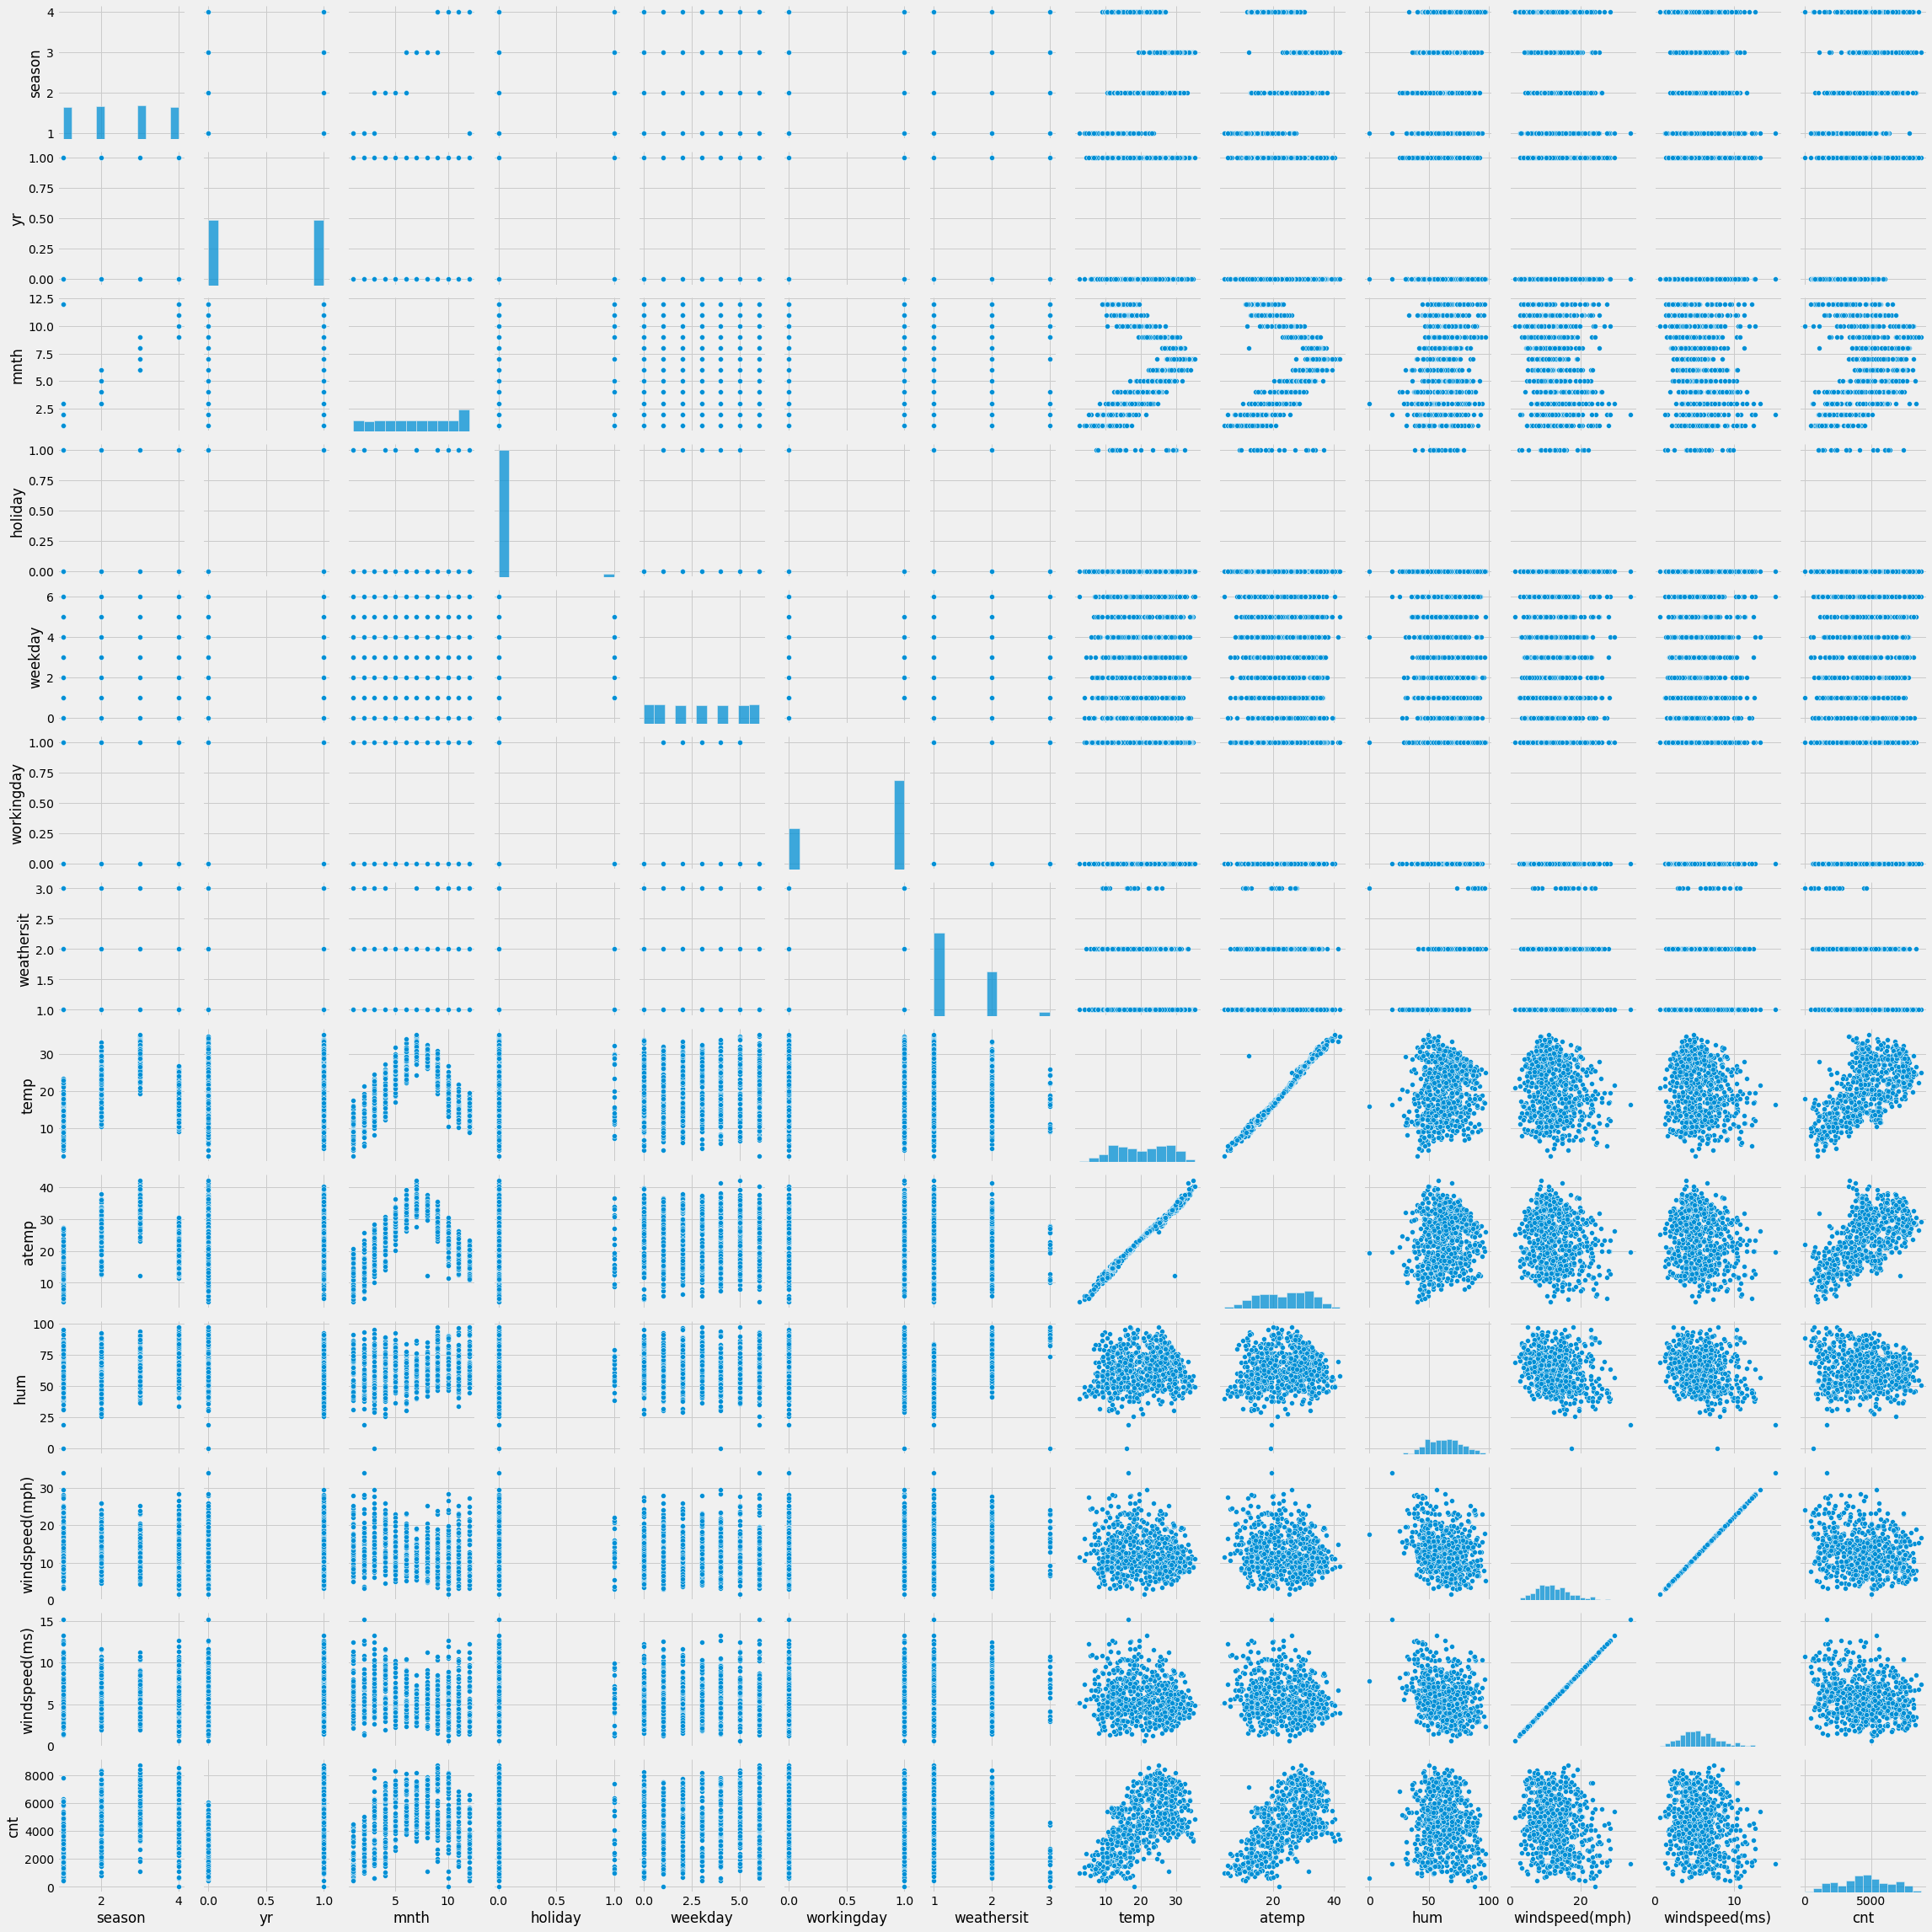

In [14]:
sns.pairplot(df.iloc[:,:])

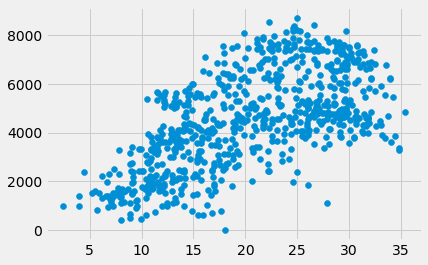

In [15]:
plt.scatter(df["temp"], df['cnt'])

# Линейная регрессия 

**Пример. Предскажем  зависимость спроса на велосипеды от температуры при помощи модели простой линейной регрессии. Построим прямую линию регрессии.**

In [16]:
# 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

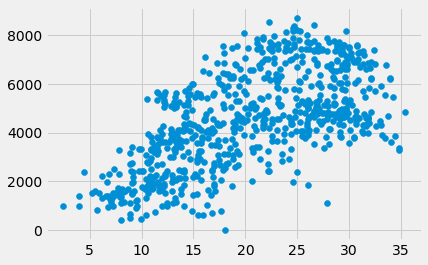

In [17]:
plt.scatter(df["temp"], df['cnt'])

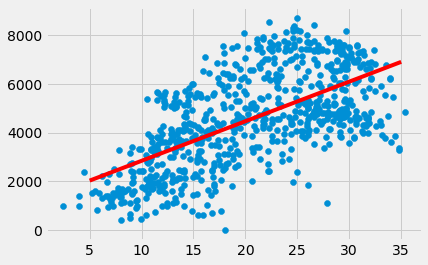

In [18]:
linreg = LinearRegression(fit_intercept = True) 

X2= df["temp"]
y2= df["cnt"]

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, 
        test_size = 0.3, random_state=42)

#x2_train= x2_train.
linreg.fit(np.array(x2_train).reshape(-1, 1), y2_train)
a = linreg.coef_
b = linreg.intercept_
plt.scatter(df["temp"], df['cnt'])

plt.plot([5, 35], [a*5 + b, a*35 + b], "r")

In [19]:
a*37 + b

array([7225.04161148])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


**Упражнение.**
Предскажите зависимость спроса от благоприятности погоды при помощи модели простой линейной регрессии. Постройте прямую линию регрессии.


In [21]:
# ваш код


**Рассмотрим модель множественной линейной регрессии:**

In [22]:
linreg = LinearRegression(fit_intercept = True) 


# параметр fit_intercept отвечает за смещение w_0, смещение не равно 0, если fit_intercept = True


Выбросим из набора целевой столбец, а также столбцы (atemp, windspeed(mph), сильно скореллированные 
                                                     c temp, windspeed(ms))

In [23]:
X = df.drop(["cnt", "atemp", "windspeed(mph)"], axis = 1)
y = df["cnt"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [24]:
X.shape, y.shape

((731, 10), (731,))

Сделаем стандартизацию (приведем данные к одному масштабу):

In [25]:
X_scal = StandardScaler().fit_transform(X)

Разделим данные на тренировочные и тестовые (70% к 30%):

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_scal, y, 
        test_size = 0.3, random_state=42)

Обучим модель линейной регрессии на тренировочных данных:

In [27]:
linreg.fit(x_train, y_train)

LinearRegression()

Сделаем предсказание на тестовой выборке:

In [28]:
y_pred = linreg.predict(X_scal)

In [29]:
y_pred.shape

(731,)

In [30]:
df["cnt"][100]


3348

In [31]:
y_pred[100]

3032.4950705667043

# **Оценка качества модели линейной регрессии**

Оценим качество модели при помощи MSE (среднеквадратичной ошибки). Напомним, что
$$ MSE  = \frac{1}{n}\sum_{i=1}^n \left(y_i - y'_i\right)^2,$$
где $y_i$ - значения целевой переменной,  $y'_i$ - предсказанные моделью значения целевой переменной.

In [32]:
y_test.shape

(220,)

In [33]:
linreg.predict(x_test).shape

(220,)

In [34]:
np.sqrt(mean_squared_error(y_test, linreg.predict(x_test)))

838.7570311751351

 Другой способ оценить качество модели регрессии - это **коэффициент детерминации $R^2$** (ниже находится формула) 

In [35]:
y_pred = linreg.predict(x_test)
d1 = y_test-y_pred

d2 = y_test-y_test.mean()

#Коэффициент детерминации равен единице минус сумма квадратов остатков, делённая на сумму общих квадратов. Разность по каждому элементу массива у нас уже есть, и нам нужно возвести их в квадрат:

r2 = 1-d1.dot(d1) / d2.dot(d2)
print(r2)

0.8231919187657434


Можно также использовать библиотеку Питон (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8231919187657434


In [37]:
X.columns, linreg.coef_ # признаки и соответствующие коэффициенты

(Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'hum', 'windspeed(ms)'],
       dtype='object'),
 array([ 604.87196359,  996.00143481, -161.21797803,  -71.09750569,
         135.23987224,   79.00889089, -343.38666036,  956.01610588,
        -116.66618292, -183.87057836]))

In [38]:
linreg.intercept_ # коэффицент w0

4499.978906008729

Выведем коэффициенты (веса) линейной регрессии в порядке убывания:

In [39]:
pd.DataFrame(linreg.coef_, X.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,996.001435
temp,956.016106
season,604.871964
weekday,135.239872
workingday,79.008891
holiday,-71.097506
hum,-116.666183
mnth,-161.217978
windspeed(ms),-183.870578
weathersit,-343.386660


Из таблицы выше видим, что наибольшее влияние на результат оказывает признак yr (год) (поскольку имеет максимальное по модулю значение), следующий за ним - temp (температура).

Посмотрим, чему равно предсказанное значение целевого признака на  первом элементе нашего датафрейма, сравним с настоящим.

In [40]:
linreg.predict(X_scal)[0], df["cnt"][0]#, np.sqrt(mean_squared_error(linreg.predict(X_scal), df["cnt"]))

(1797.6397950732298, 985)

# Модели регрессии с регуляризацией

Обучим модель линейной регрессии с L1- регуляризацией Lasso, выведем  коэффициенты. Определим признак, который оказывает наибольшее влияние на результат.

In [41]:

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso.coef_, lasso.intercept_
X.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed(ms)'],
      dtype='object')

In [42]:
pd.DataFrame(lasso.coef_, X.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,994.952437
temp,955.839633
season,598.707887
weekday,134.369362
workingday,78.316394
holiday,-70.580533
hum,-115.777315
mnth,-154.977725
windspeed(ms),-182.797815
weathersit,-343.075477


Сделаем предсказание для модели с регуляризацией LASSO и оценим качество при помощи MSE. 

In [43]:
# ваш код
y_pred_lasso = lasso.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

838.7368360897872

Обучим модель линейной регрессии для датафрейма, из которого не выброшены столбцы atemp, windspeed(mph), **тогда в отличие от линейной регрессии модели с регуляризацией должны дать коэффициенты, близкие к нулю, при сильно скоррелированных признаках.**

In [44]:
X1 = df.drop(["cnt"], axis = 1)
X1_scal, y = StandardScaler().fit_transform(X1), df["cnt"]
x_train, x_test, y_train, y_test = train_test_split(X1_scal, y, 
        test_size = 0.3, random_state=42)
linreg.fit(x_train, y_train)
pd.DataFrame(linreg.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)


,coef
windspeed(mph),1.326716e+13
atemp,1.442975e+03
yr,9.924547e+02
season,5.940299e+02
weekday,1.361749e+02
workingday,7.597844e+01
holiday,-6.452239e+01
hum,-1.367637e+02
mnth,-1.623455e+02
weathersit,-3.233792e+02


Как видим, модель линейной регрессии получилась плохая из-за мультиколлинеарности (огромные коэффициенты ведут к огромной ошибке на тестовой выборке). 

Обучим модель с L1- регуляризацией с коэффициентом регуляризации 0.1, 10 (слабая и сильная  регуляризация), чтобы решить проблему мультиколлинеарности. Коэффициенты при сильно скоррелированных признаках должны быть близки к нулю. Таким образом, Lasso-регрессия (и Ridge - регрессия тоже) служит методом отбора признаков.

In [45]:
# ваш код для lasso
lasso_weak = Lasso(alpha=0.1)
lasso_strong = Lasso(alpha=10)

Посмотрим, какие коэффициенты (при каких признаках) зануляются в случае коэффициентов регуляризации 0.1, 10.

In [46]:
lasso_weak.fit(x_train, y_train)
lasso_strong.fit(x_train, y_train)
pd.DataFrame(lasso_weak.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
atemp,1.389491e+03
yr,9.909295e+02
season,5.910584e+02
weekday,1.369270e+02
workingday,7.509354e+01
windspeed(ms),-6.989402e-08
holiday,-6.464994e+01
hum,-1.368398e+02
windspeed(mph),-1.521870e+02
mnth,-1.571890e+02


In [47]:
pd.DataFrame(lasso_strong.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,9.818928e+02
atemp,9.704998e+02
season,5.333378e+02
weekday,1.277210e+02
workingday,6.908793e+01
temp,0.000000e+00
windspeed(ms),-1.093608e-08
holiday,-6.138028e+01
mnth,-9.650795e+01
hum,-1.226605e+02


Видим, что в слабой модели практически нулевое значение у коэффициента признака windspeed(ms),
а в сильной у признаков temp и windspeed(ms). То есть эти модели ведут себя лучше чем линейная регрессия
и служат методами отбора признаков. Вычислим MSE на 3-х моделях и сравним. 

In [48]:
y_pred_l_w = lasso_weak.predict(x_test)
y_pred_l_s = lasso_strong.predict(x_test)
y_pred = linreg.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_l_w)), np.sqrt(mean_squared_error(y_test, y_pred_l_s)),
np.sqrt(mean_squared_error(y_test, y_pred)))


864.9035838120426 849.5598356564013 866.4989265740152


Оптимальное значение коэффициента регуляризации для lasso можно настроить при помощи  кросс-валидации на сетке.

**Перекрёстная прове́рка (кросс-проверка, скользящий контроль, англ. cross-validation) — метод оценки аналитической модели и её поведения на независимых данных. При оценке модели имеющиеся в наличии данные разбиваются на $k$ частей. Затем на $k−1$ частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования. Процедура повторяется $k$ раз; в итоге каждая из $k$ частей данных используется для тестирования.  Оптимальным считается значение параметра, при котором достигается максимум усредненных показателей качества $k$  моделей.**

Ниже выведем его и коэффициенты регрессии.

In [49]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas) # перебираем alpha на сетке от 0.1 до 10, с одинаковым шагом
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_,lasso_cv.coef_ # выведем наилучший alpha, коэффициенты 

(2.935678391959799,
 array([ 5.76356014e+02,  9.89296681e+02, -1.40138584e+02, -6.50577577e+01,
         1.33871213e+02,  7.39913906e+01, -3.29760378e+02,  0.00000000e+00,
         9.71590427e+02, -1.28921157e+02, -1.58501243e+02, -1.18476113e-08]))

**Задание 1. Обучите аналогично модель гребневой регрессии Ridge. Выведите коэффициенты. Зануляются ли какие-то? Вычислите MSE.**   

In [50]:
# ваш код, примерный ниже 
#ridge = Ridge()
#ridge.fit(x_train, y_train)
#pd.DataFrame(ridge.coef_, X1.columns, columns=["coef"]).sort_values(
#    by="coef", ascending=False)
#y_pred = ridge.predict(x_test)
#print(np.sqrt(mean_squared_error(y_test, y_pred))

**Задание 2 (дополнительное). Найдите оптимальное значение коэффициента для гребневой регрессии (L2-регуляризация).**

In [51]:
# ваш код

## Случайный лес

Обучим модель случайного леса для решения поставленной выше задачи регрессии.

In [52]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 5, 
                           min_samples_leaf= 5, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, random_state=42)

In [53]:
rf_pred = rf.predict(x_test)

Обучим случайный лес на тренировочной выборке и сделаем предсказание для тестовой выборки:

In [54]:
np.sqrt(mean_squared_error(y_test, rf_pred))

781.388397364277

Случайный лес показал себя лучше, чем представленные выше модели.

In [55]:
pd.DataFrame(rf.feature_importances_, X1.columns, 
             columns=["rf_coef"]).sort_values(by="rf_coef", ascending=False)

,rf_coef
temp,0.324141
yr,0.295515
atemp,0.240177
season,0.049811
hum,0.044984
mnth,0.017505
weekday,0.006704
windspeed(mph),0.006638
weathersit,0.006546
windspeed(ms),0.005967


Видим, что самым важным признаком для данной модели является температура. 

Следующее задание сделайте по вариантам (номер варианта - 1 для тех, кто в журнале имеет имеет номер
1, 4, 7,..., номер варианта - 2 для 2, 5, 8 и т.д., номер 3, для 3, 6, 9, ...). 

**3.1. Загрузите набор данных sales.csv. 
Рассчитайте коэффициенты множественной регрессии для расчета объема продаж (SALES) по объему рекламы (ADV) и цены батончика (PRICE).
При помощи рассчитанных коэффициентов  найдите объем продаж в магазине с рекламой 400 долларов в месяц и ценой батончика 79 центов. Деление на тренировочную и тестовую выборку делать не нужно. Масштабирование делать не нужно. Должно получиться примерно 3078.5. Чтобы получилось это число, найдите коэффициенты регрессии как в примере выше и умножьте их на значения выше, просуммируйте получившиеся значения, это и будет ответ. Еще может понадобиться коэффициент для смещения. 
Оцените качество получившейся модели при помощи коэффициента детерминации.**


In [56]:
#код
df = pd.read_csv("../input/sales/sales.csv")
df.head()
X1, y = df.drop(["SALES"], axis = 1), df['SALES']
lr = LinearRegression(fit_intercept= True)
lr.fit(X1, y)
a = lr.coef_
b = lr.intercept_




#обучите модель на X1, y, сделайте предсказание

In [57]:
a

array([-53.21733631,   3.61305804])

In [58]:
a[0]*79 + a[1]*400 + b 

3078.5744047619046

**3.2. Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.**
**Столбцы Date - дата премьеры,
Title - название, 
Genre - жанр,
Studio - студия
Theaters - число кинотеатров
Opening Gross - доход от премьеры
Opening Theaters - число кинотеатров для премьеры
Gross - общий доход
Примените простую линейную регрессию для предсказания дохода от показа фильмов от количества кинтоеатров (соответственно столбцы Gross и Theaters). Уберите категориальные столбцы (дата, название, студия, жанр).  Обработайте столбцы со строками. Примеры ниже. Предскажите, чему будет равен доход для 1700 кинотеатров.**


In [59]:
# загрузите набор данных
import pandas as pd
df = pd.read_csv("../input/sandler/sandler.csv")
df.head()
# сделайте предобработку, раскомментируя строки ниже
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
X1, y = df.drop(["Gross"], axis = 1), df['Gross']
# обучите модель на X1, y 
# сделайте предсказание

In [60]:
df.corr()

,Theaters,Opening Gross,Opening Theaters,Gross
Theaters,1.000000,0.864756,0.975711,0.816622
Opening Gross,0.864756,1.000000,0.839659,0.969398
Opening Theaters,0.975711,0.839659,1.000000,0.776947
Gross,0.816622,0.969398,0.776947,1.000000


**3.3. Постройте модель множественной регрессии в задании 3.2. Предварительно найдите коллинеарные признаки и уберите их из модели или примените модели с регуляризацией. Оцените качество.**

**3.4. Откройте набор House3.csv. В ней мы будем предсказывать стоимость дома по его площади и наличию камина. Целевой столбец – Price. Нецелевые – Area, Kamin.
Очевидно, что дом с камином стоит больше, чем без него, поэтому наличие камина также нужно включить в нашу модель.
Закодируйте камин 0/1. Сделайте предсказание цены дома, используя модель линейной регрессии для размера дома равного 2, с камином.**

In [61]:
df = pd.read_csv("../input/house3/house.csv")
df.head()

#  d = {'No' : 0, 'Yes' : 1}
#df['Kamin'] = df['Kamin'].map(d)
#X1, y = df.drop(["Price"], axis = 1), df['Price']
# обучите модель на X1, y 
# сделайте предсказание

,Price,Area,Kamin
0,84.4,2.00,Yes
1,77.4,1.71,No
2,75.7,1.45,No
3,85.9,1.76,Yes
4,79.1,1.93,No


3.5. Статистическая значимость...

# **Коэффициент эластичности. Формула для вектора весов в уравнении регрессии.**

Коэффициент эластичности для простой линейной регрессии $y=a + bx$ $$\varepsilon=b\frac{\overline{x}}{\overline{y}}.$$

Коэффициент эластичности показывает, на сколько процентов в среднем изменяется результативный признак у при изменении факторного признака х на 1%.

Вектор весов $w$ можно рассчитать по формуле

$$w=(X^TX)^{-1}X^Ty,$$

где X - матрица со значениями независимых переменных, y - целевой признак.

В случае простой линейной регрессии (Крыштановский) оптимальные значения коэффициентов в уравнении линейной регрессии 
$y=b_1x+b_0$ равны:
$$b_1=\frac{cov(x,y)}{D_x}, b_0=\overline{y}-b_1\overline{x}$$

$$cov(x,y) =\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})$$ - ковариация, $\overline{x}$, $\overline{y}$ - средние значения.

Или так

$$b_1=r_{xy}\frac{S_y}{S_x}$$ где $r_{xy}$ -- коэффициент корреляции Пирсона, $S_x$, $S_y$ -- среднеквадратичные отклонения, $D_x=S_x^2$ - выборочная дисперсия.

Качество модели л.р. можно также определить при помощи коэффициента детерминации ($\hat{y}$ - предсказанная, $y$ - фактическая, https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8 )
$$R^2=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i-\overline{y})^2}.$$

Можно сказать что, это показатель качества модели и чем он выше тем лучше. Понятное дело, что он не может быть больше 1 и считается неплохо, когда $R^2$ выше 0,8, а если меньше 0,5, то смысл такой модели можно смело ставить под большой вопрос.

Коэффициент детерминации рассматривают, как правило, в качестве основного показателя, отражающего меру качества регрессионной модели, описывающей связь между зависимой и независимыми переменными модели. Коэффициент детерминации показывает, какая доля вариации объясняемой переменной y учтена в модели и обусловлена влиянием на нее факторов, включенных в модель.

Коэффициент множественной детерминации R-квадрат показывает, какую долю изменчивости (можно выразить в процентах) зависимой переменной (Y) объясняет независимая переменная (регрессионная модель).


Упражнение.
Вычислить коэффициент детерминации.

In [62]:
from sklearn.metrics import r2_score
#r2_score(y_true, y_pred)
#d1 = Y – Yhat

#d2 = Y – Y.mean()

#Коэффициент детерминации равен единице минус сумма квадратов остатков, делённая на сумму общих квадратов. Разность по каждому элементу массива у нас уже есть, и нам нужно возвести их в квадрат:

#r2 = 1 – d1.dot(d1) / d2.dot(d2)

#Даём команду на печать

#print(“the r-squared is:”, r2)
# https://craftappmobile.com/coefficient-of-determination/#__R
